In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (70000, 784)
y shape: (70000,)


In [9]:
X_copy = X.copy()
y_copy = y.copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, train_size=0.15)

In [11]:
def plot_digit(digits):
    fig, ax = plt.subplots(figsize=(8, 8))
    data = []
    idx = 0

    for _ in range(digits.shape[0] // 4):
        row = digits[idx].reshape(28, 28)
        idx += 1
        for _ in range(3):
            row = np.concatenate((row, digits[idx].reshape(28, 28)), axis=1)
            idx += 1

        if len(data) == 0:
            data = row
        else:
            data = np.concatenate((data, row), axis=0)
        
    ax.imshow(data, cmap='binary')
    ax.axis('off')

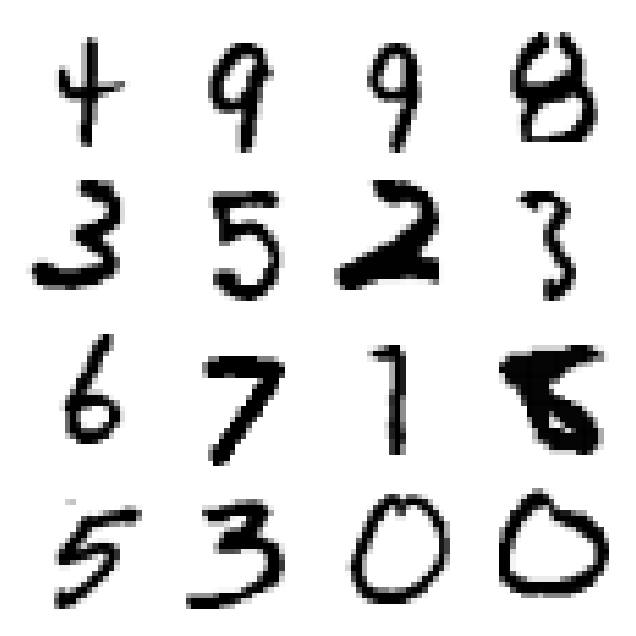

In [12]:
plot_digit(X_train[:16])

In [13]:
y_train[:16]

array(['4', '9', '9', '8', '3', '5', '2', '3', '6', '7', '7', '8', '5',
       '3', '0', '0'], dtype=object)

In [14]:
def grid_search_best_params(model, param_grid):
    grid_search = RandomizedSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_, grid_search.best_score_

In [15]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          KNeighborsClassifier()]

model_names = ['decision_tree',
              'random_forest',
              'k_neighbors']

param_grids = [
    {'splitter' : ['best', 'random'], 'min_samples_split' : randint(1, 4), 'min_samples_leaf' : randint(1, 4)},
    {'min_samples_split' : randint(1, 4), 'min_samples_leaf' : randint(1, 4)},
    {'weights' : ['uniform', 'distance'], 'n_neighbors' : randint(2, 8)}
    
]

In [16]:
randomized_search_models = []
scores = []

for i in range(len(models)):
    temp_model, temp_score = grid_search_best_params(models[i], param_grids[i])
    randomized_search_models.append(temp_model)
    scores.append(f'{model_names[i]}: {temp_score}')
    print(model_names[i])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/sit

decision_tree


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/s

random_forest
k_neighbors


In [18]:
for score in scores:
    print(score)

decision_tree: 0.8003809523809524
random_forest: 0.9464761904761906
k_neighbors: 0.9484761904761905
